In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
data = pd.read_csv('../datasets/train.csv')

/tmp/ipykernel_9828/1184112508.py:2: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../datasets/train.csv')


In [3]:
# Show a sample of column 41 (replace 41 with the correct index if zero-based)
col_41_name = data.columns[41]
print(f"\nColumn 41 name: {col_41_name}")
print("\nSample values from column 41:")
print(data[col_41_name].sample(10, random_state=1))

# Show the types present in column 41
print("\nData types in column 41:")
print(data[col_41_name].apply(type).value_counts())


Column 41 name: postal

Sample values from column 41:
95177     680275
109015    730609
145236    211048
38007     350109
69483     460035
26091     520330
12619     510769
96634     760296
122742    460008
66280     120420
Name: postal, dtype: object

Data types in column 41:
<class 'str'>    114688
<class 'int'>     35946
Name: postal, dtype: int64


In [4]:
# 1. Check for non-numeric characters
non_numeric = data[~data['postal'].astype(str).str.match(r'^\d+$')]
print("Values containing non-numeric characters:")
print(non_numeric['postal'].unique() if len(non_numeric) > 0 else "None found")

# 2. Check for special characters
special_chars = data[data['postal'].astype(str).str.contains(r'[^A-Za-z0-9]')]
print("\nValues containing special characters:")
print(special_chars['postal'].unique() if len(special_chars) > 0 else "None found")

# 3. Check length of each postal code (should be 6 digits)
length_check = data[data['postal'].astype(str).str.len() != 6]
print("\nValues with length != 6:")
print(length_check['postal'].unique() if len(length_check) > 0 else "None found")

# 4. Check value ranges (Singapore postal codes range from 000000 to 999999)
# Only check numeric values
numeric_mask = data['postal'].astype(str).str.match(r'^\d+$')
numeric_postal = pd.to_numeric(data.loc[numeric_mask, 'postal'], errors='coerce')
out_of_range = numeric_postal[(numeric_postal < 0) | (numeric_postal > 999999)]
print("\nValues out of valid range (000000-999999):")
print(out_of_range.unique() if len(out_of_range) > 0 else "None found")

# 5. Summary of potential issues
print("\nSummary:")
print(f"Total rows: {len(data)}")
print(f"String values: {len(data[data['postal'].apply(type) == str])}")
print(f"Integer values: {len(data[data['postal'].apply(type) == int])}")

Values containing non-numeric characters:
['NIL']

Values containing special characters:
None found

Values with length != 6:
['90107' '58340' '80009' '90001' '90028' 'NIL' '85201' '90007' '90022'
 '81003' '50533' '90101' '80016' '85501' '90034' '90110' '81007' '85301'
 '51335' '81001' '85701' '50004' '80103' '85401' '80008' '90111' '90013'
 '90018' '91016' '91023' '90035' '80011' '85101' '90113' '50532' '90008'
 '85601' '90006' '90108' '90039' '82002' '81005' '80104' '80013' '80334'
 '90015' '90115' '90109' '80003' '91017' '50538' '90042' '90037' '80006'
 '80019' '81004' '90025' '81110' '80106' '90102' '90030' '90021' '80004'
 '90104' '90026' '90040' '91012' '90114' '90017' '90020' '90033' '81008'
 '90112' '80005' '90103' '90038' '50536' '80012' '50535' '90031' '90032'
 '80017' '82001' '80109' '52335' '90010' '90005' '91014' 90111 90040 82002
 81008 90033 85501 91012 90005 90021 80109 90025 90018 80013 80012 82001
 90001 90042 90113 81110 85301 80011 80009 85401 50533 81002 50532 8510

In [5]:
# Get a reproducible random sample by setting random_state
sample = data.sample(n=20, random_state=42)
print(sample)

            id Tranc_YearMonth             town  flat_type block  \
107690  136547         2016-04         SENGKANG     4 ROOM  259C   
100411  172234         2014-04         SENGKANG     5 ROOM  224C   
23295   184869         2016-10        TOA PAYOH  EXECUTIVE   99C   
68880    21055         2020-10    MARINE PARADE     3 ROOM    67   
88677   172252         2017-05         TAMPINES     5 ROOM  491G   
26685   102087         2016-04      JURONG WEST     4 ROOM  651B   
80492   112600         2013-07  KALLANG/WHAMPOA     4 ROOM    17   
69006    13629         2019-12       QUEENSTOWN     3 ROOM   161   
19280   124197         2015-10        PASIR RIS     4 ROOM   774   
88033    90599         2012-07         TAMPINES     5 ROOM   731   
93953   101114         2016-08    CHOA CHU KANG     4 ROOM   770   
46524   116661         2012-03      JURONG WEST     4 ROOM   635   
117699  137139         2020-11        WOODLANDS     5 ROOM   877   
140214  101890         2020-11      JURONG WEST 

In [6]:
# 1. Basic dataset information
print("1. Basic dataset information:")
print("\nDataset Shape:", data.shape)
print("\nDataset Info:")
data.info()

# 2. Check for missing values
print("-" * 50)
print("\n2. Missing Values:")
print(data.isna().sum())

# 3. Check for duplicates
print("-" * 50)
print("\n3. Number of duplicates:", data.duplicated().sum())

1. Basic dataset information:

Dataset Shape: (150634, 77)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month 

In [7]:
# Get unique towns and their count
n_towns = data['town'].nunique()
print(f"Number of distinct towns: {n_towns}")

# Display the list of unique towns
print("\nList of towns:")
print(sorted(data['town'].unique()))

Number of distinct towns: 26

List of towns:
['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH', 'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST', 'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL', 'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN']


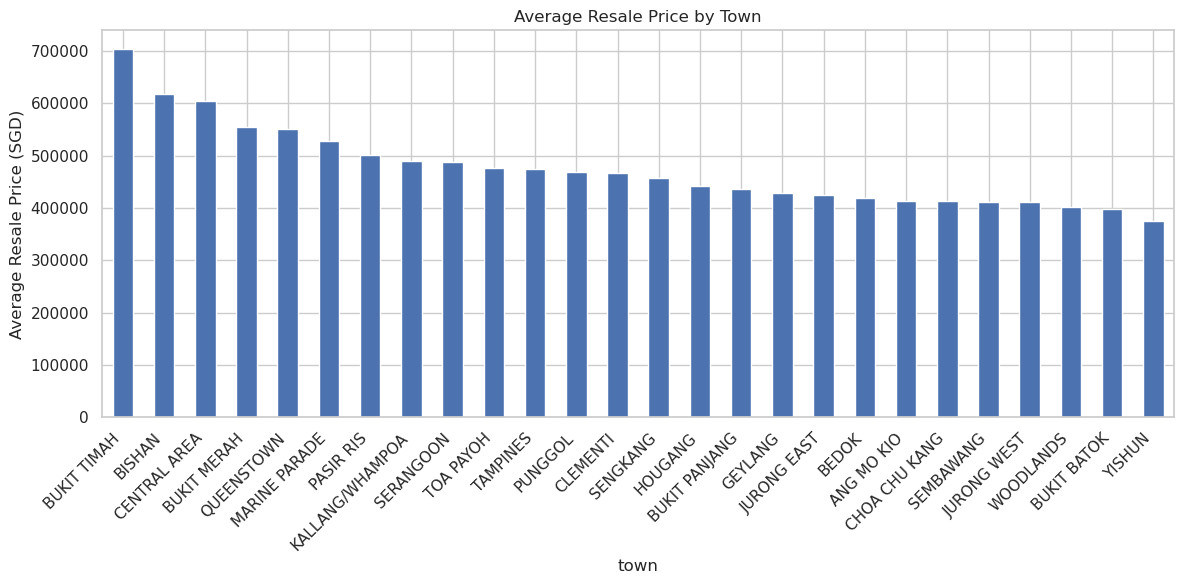

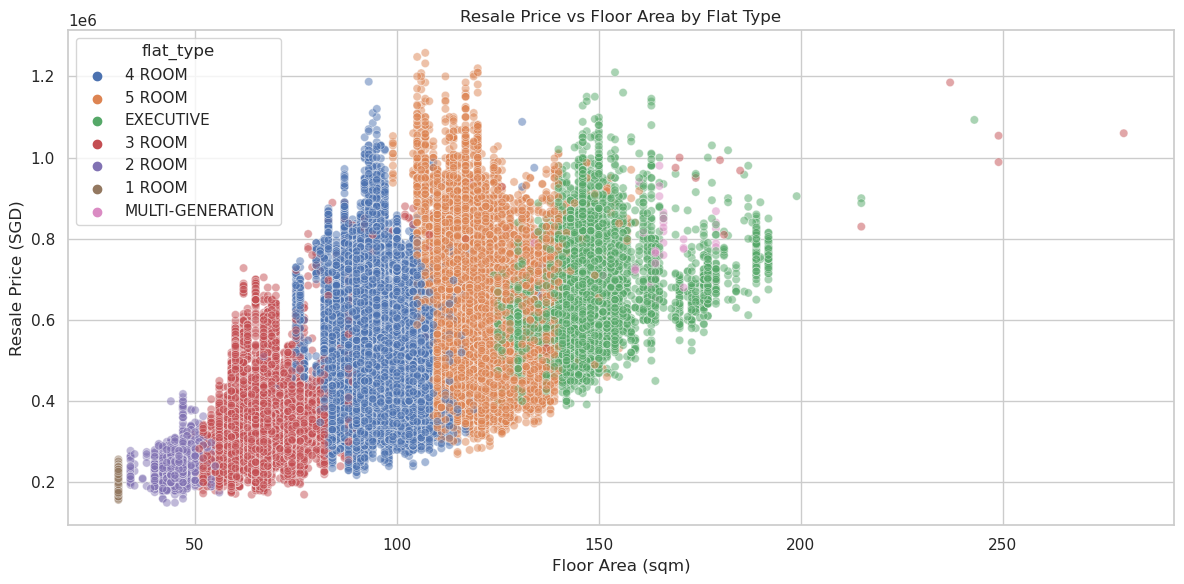

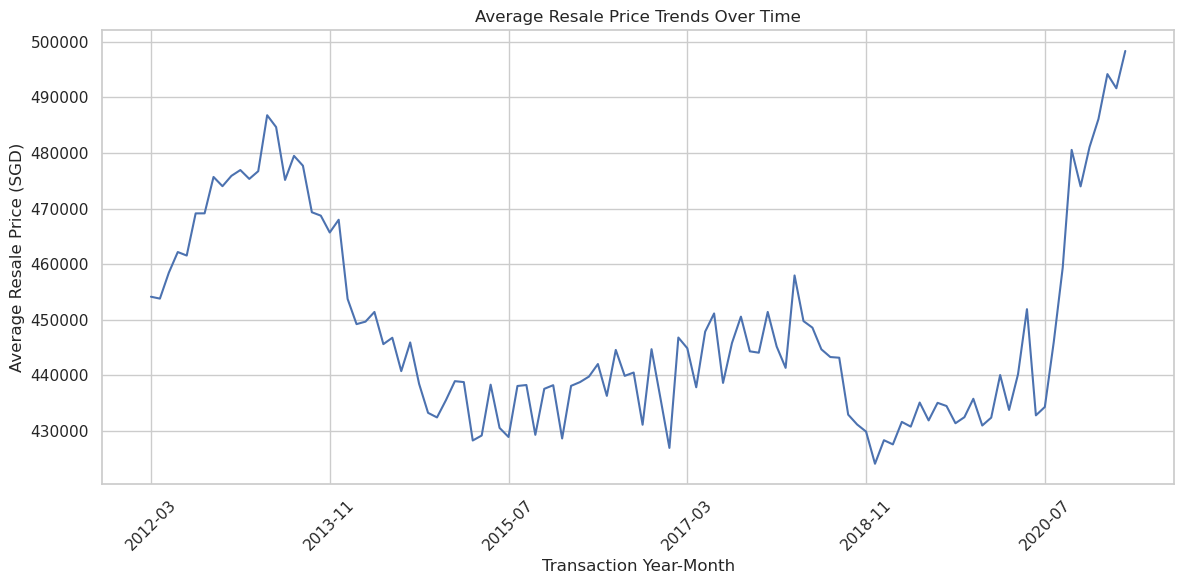

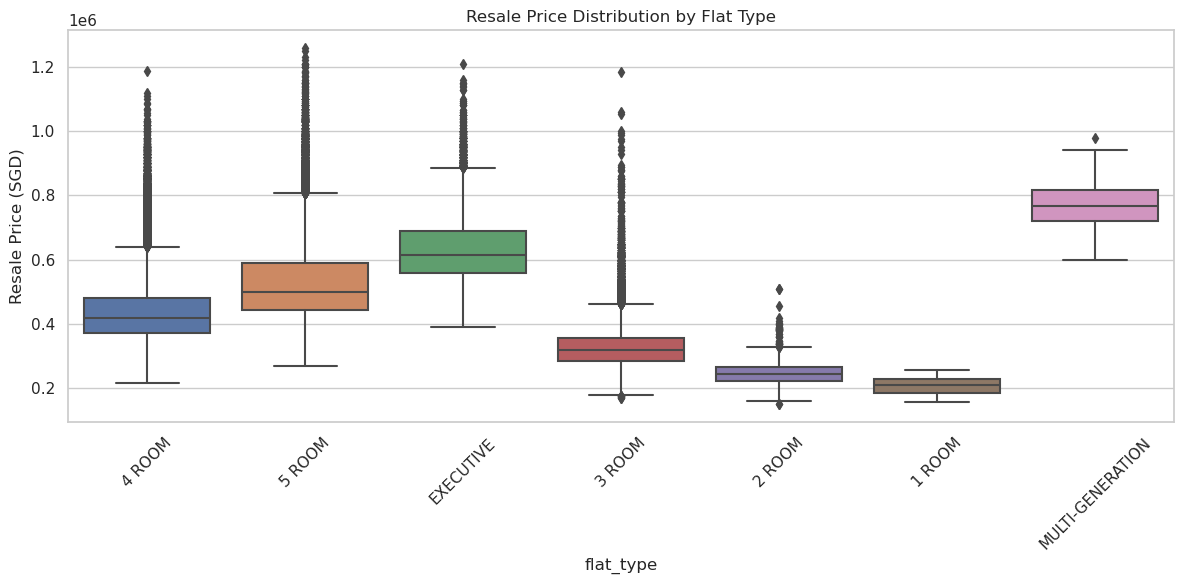

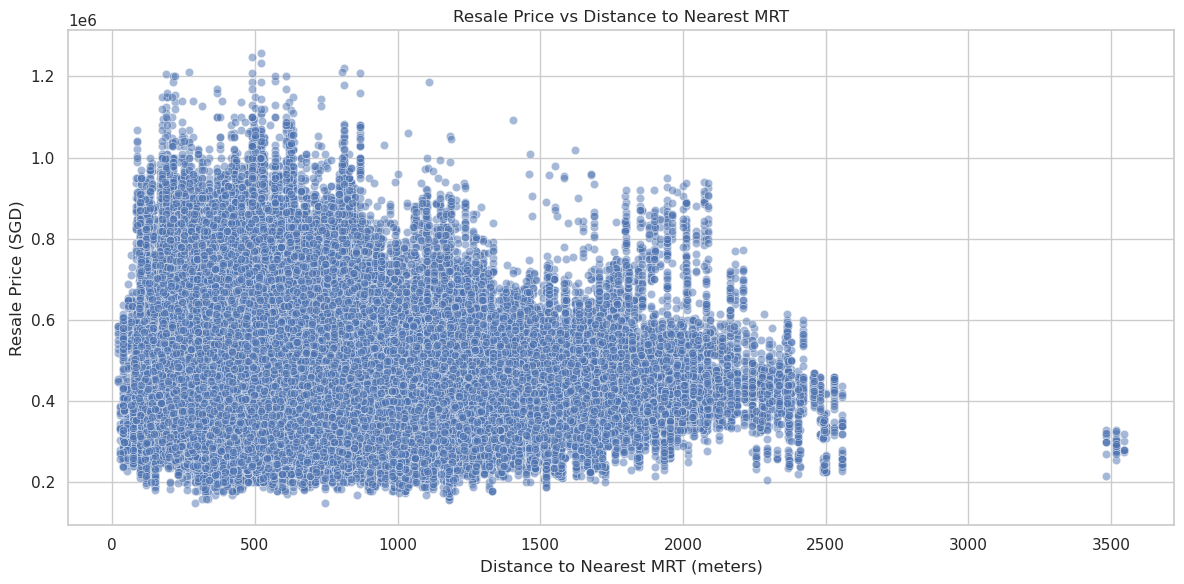

In [8]:
# Set up the visualization environment
sns.set_theme(style="whitegrid") 
fig_size = (12, 6)

# 1. Average Resale Price by Town
plt.figure(figsize=fig_size)
avg_price_by_town = data.groupby('town')['resale_price'].mean().sort_values(ascending=False)
avg_price_by_town.plot(kind='bar')
plt.title('Average Resale Price by Town')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Resale Price (SGD)')
plt.tight_layout()

# 2. Price vs Floor Area with Flat Type
plt.figure(figsize=fig_size)
sns.scatterplot(data=data, x='floor_area_sqm', y='resale_price', hue='flat_type', alpha=0.5)
plt.title('Resale Price vs Floor Area by Flat Type')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price (SGD)')
plt.tight_layout()

# 3. Price Trends Over Time
plt.figure(figsize=fig_size)
monthly_avg_price = data.groupby('Tranc_YearMonth')['resale_price'].mean()
monthly_avg_price.plot(kind='line')
plt.title('Average Resale Price Trends Over Time')
plt.xlabel('Transaction Year-Month')
plt.ylabel('Average Resale Price (SGD)')
plt.xticks(rotation=45)
plt.tight_layout()

# 4. Box Plot of Prices by Flat Type
plt.figure(figsize=fig_size)
sns.boxplot(data=data, x='flat_type', y='resale_price')
plt.title('Resale Price Distribution by Flat Type')
plt.xticks(rotation=45)
plt.ylabel('Resale Price (SGD)')
plt.tight_layout()

# 5. Impact of MRT Distance on Price
plt.figure(figsize=fig_size)
sns.scatterplot(data=data, x='mrt_nearest_distance', y='resale_price', alpha=0.5)
plt.title('Resale Price vs Distance to Nearest MRT')
plt.xlabel('Distance to Nearest MRT (meters)')
plt.ylabel('Resale Price (SGD)')
plt.tight_layout()




Distribution of properties across regions:
OCR    122068
RCR     22608
CCR       369
Name: region, dtype: int64

Average resale prices by region:
region
CCR    704416.883469
RCR    522309.068085
OCR    431815.724612
Name: resale_price, dtype: float64


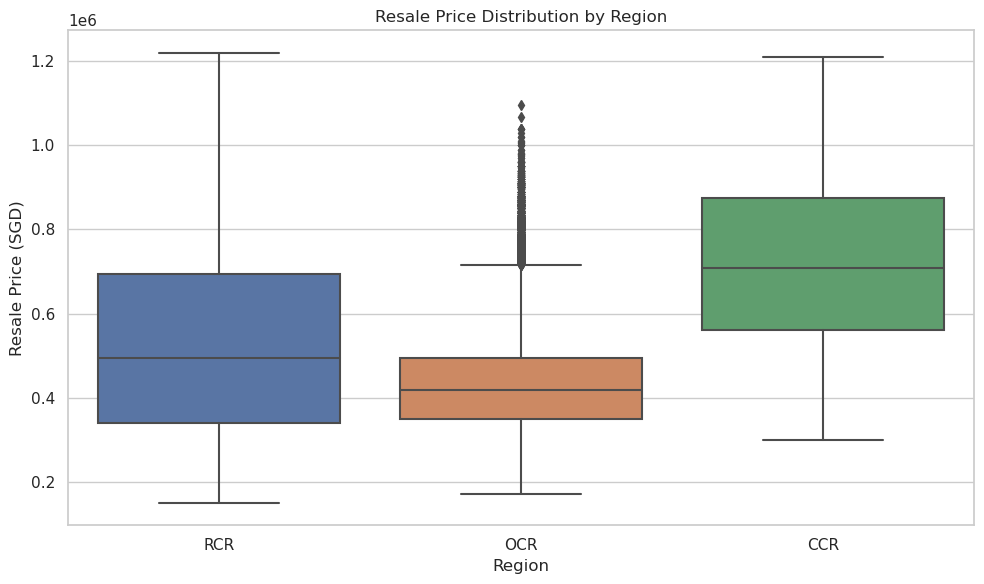

In [9]:
# Create a mapping dictionary for towns to regions
region_mapping = {
    # Core Central Region (CCR)
    'BUKIT TIMAH': 'CCR',
    'DOWNTOWN CORE': 'CCR',
    'NEWTON': 'CCR',
    'NOVENA': 'CCR',
    'ORCHARD': 'CCR',
    'RIVER VALLEY': 'CCR',
    'SENTOSA': 'CCR',
    'TANGLIN': 'CCR',
    
    # Rest of Central Region (RCR)
    'BISHAN': 'RCR',
    'BUKIT MERAH': 'RCR',
    'GEYLANG': 'RCR',
    'KALLANG': 'RCR',
    'MARINE PARADE': 'RCR',
    'QUEENSTOWN': 'RCR',
    'TOA PAYOH': 'RCR',
    
    # Outside Central Region (OCR)
    'ANG MO KIO': 'OCR',
    'BEDOK': 'OCR',
    'BUKIT BATOK': 'OCR',
    'BUKIT PANJANG': 'OCR',
    'CHOA CHU KANG': 'OCR',
    'CLEMENTI': 'OCR',
    'HOUGANG': 'OCR',
    'JURONG EAST': 'OCR',
    'JURONG WEST': 'OCR',
    'PASIR RIS': 'OCR',
    'PUNGGOL': 'OCR',
    'SEMBAWANG': 'OCR',
    'SENGKANG': 'OCR',
    'SERANGOON': 'OCR',
    'TAMPINES': 'OCR',
    'WOODLANDS': 'OCR',
    'YISHUN': 'OCR'
}

# Create a new column 'region' based on the mapping
data['region'] = data['town'].map(region_mapping)

# Display the distribution of properties across regions
print("\nDistribution of properties across regions:")
print(data['region'].value_counts())

# Calculate average prices by region
avg_price_by_region = data.groupby('region')['resale_price'].mean().sort_values(ascending=False)
print("\nAverage resale prices by region:")
print(avg_price_by_region)

# Create a box plot to show price distribution by region
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='region', y='resale_price')
plt.title('Resale Price Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Resale Price (SGD)')
plt.xticks(rotation=0)
plt.tight_layout()

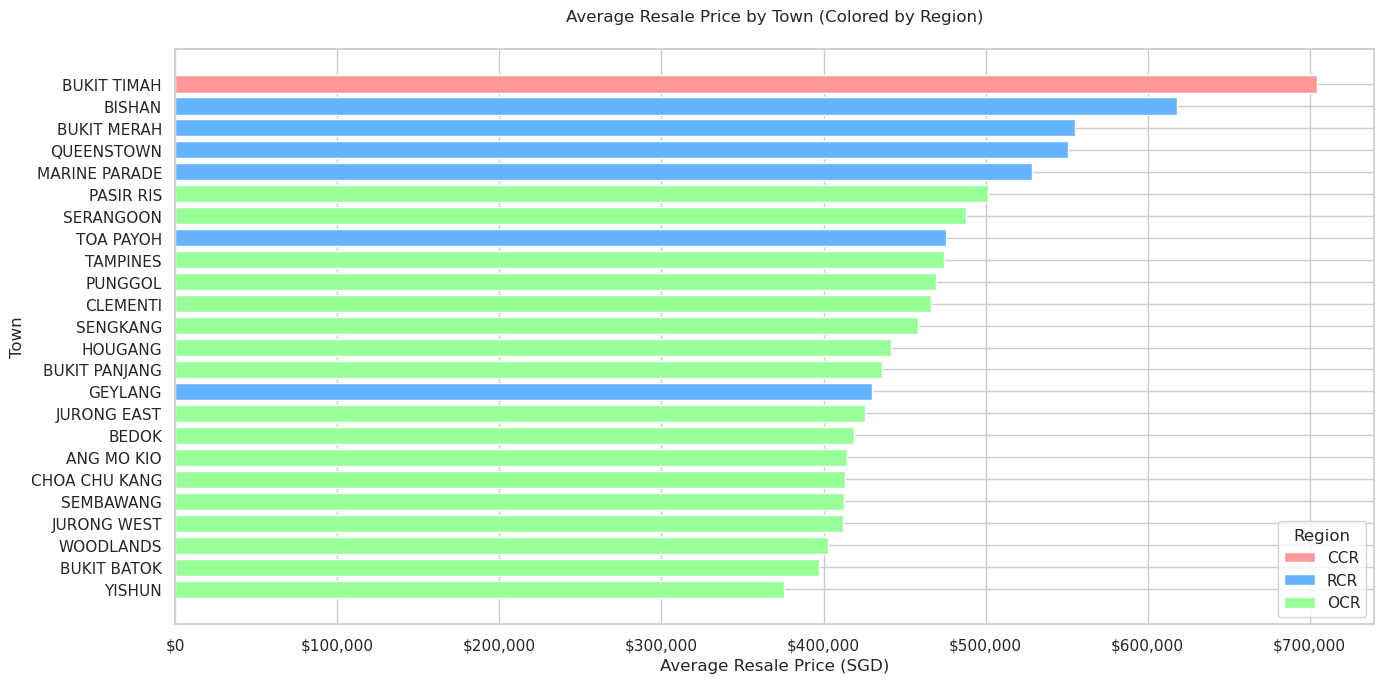

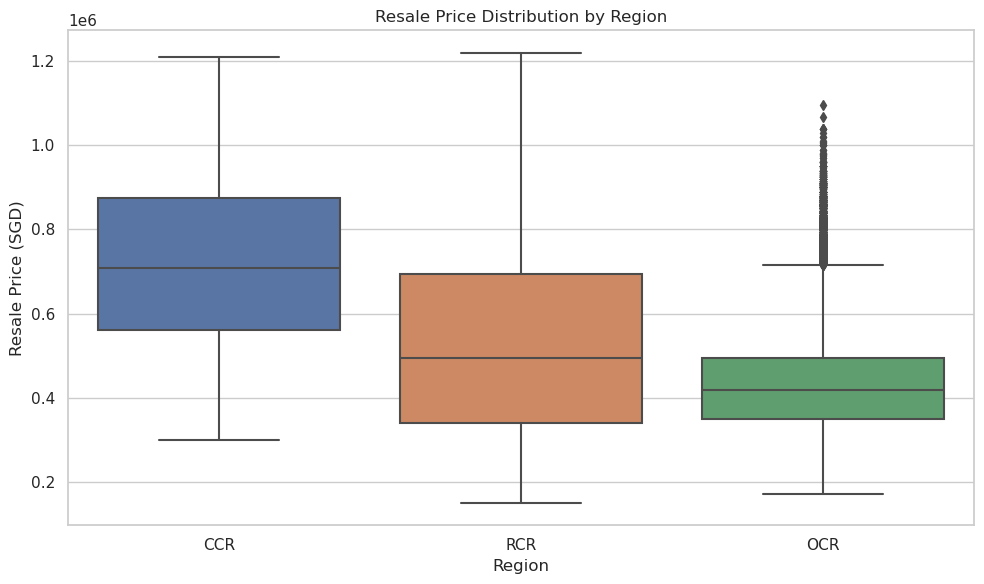

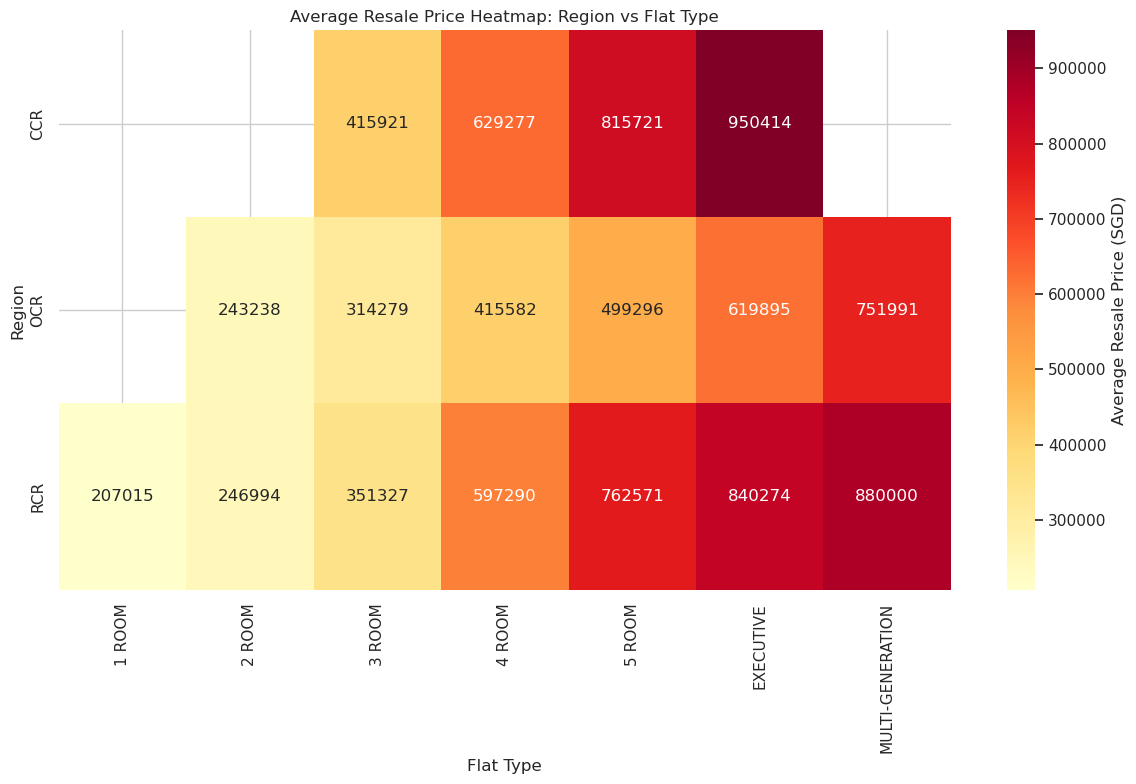

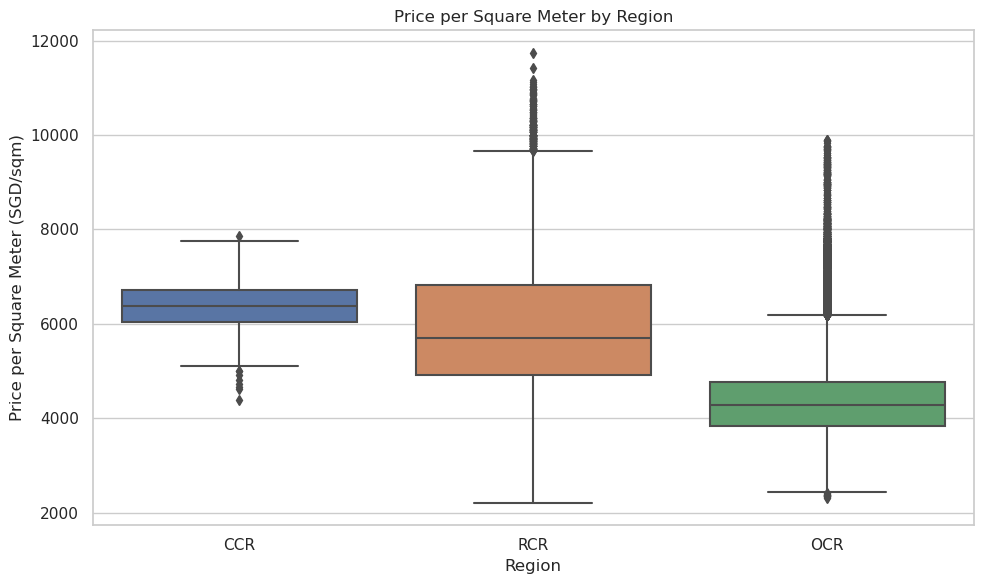

In [10]:
# Set the style and figure size for better visualization
sns.set_theme(style="whitegrid")
fig_size = (12, 6)

# 1. Average Resale Price by Region and Town
plt.figure(figsize=(14, 7))
avg_price_by_town = data.groupby(['region', 'town'])['resale_price'].mean().reset_index()
avg_price_by_town = avg_price_by_town.sort_values('resale_price', ascending=True)

# Create color mapping for regions
color_map = {'CCR': '#ff9999', 'RCR': '#66b3ff', 'OCR': '#99ff99'}
colors = [color_map[region] for region in avg_price_by_town['region']]

bars = plt.barh(avg_price_by_town['town'], avg_price_by_town['resale_price'], color=colors)
plt.title('Average Resale Price by Town (Colored by Region)', pad=20)
plt.xlabel('Average Resale Price (SGD)')
plt.ylabel('Town')

# Add a legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color_map[region], label=region) 
                  for region in ['CCR', 'RCR', 'OCR']]
plt.legend(handles=legend_elements, title='Region')

# Format price labels
def format_price(x, p):
    return f'${x:,.0f}'
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_price))
plt.tight_layout()

# 2. Box Plot of Prices by Region
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='region', y='resale_price', order=['CCR', 'RCR', 'OCR'])
plt.title('Resale Price Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Resale Price (SGD)')
plt.xticks(rotation=0)
plt.tight_layout()

# 3. Heatmap of Average Prices by Region and Flat Type
plt.figure(figsize=(12, 8))
heatmap_data = data.pivot_table(
    values='resale_price',
    index='region',
    columns='flat_type',
    aggfunc='mean'
)

# Create heatmap with proper formatting for float values
sns.heatmap(heatmap_data, 
            annot=True, 
            fmt='.0f',  # Changed from ',d' to '.0f' to handle float values
            cmap='YlOrRd',
            cbar_kws={'label': 'Average Resale Price (SGD)'})
plt.title('Average Resale Price Heatmap: Region vs Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Region')
plt.tight_layout()

# 4. Additional Analysis: Price per Square Meter by Region
plt.figure(figsize=(10, 6))
data['price_per_sqm'] = data['resale_price'] / data['floor_area_sqm']
sns.boxplot(data=data, x='region', y='price_per_sqm', order=['CCR', 'RCR', 'OCR'])
plt.title('Price per Square Meter by Region')
plt.xlabel('Region')
plt.ylabel('Price per Square Meter (SGD/sqm)')
plt.tight_layout()

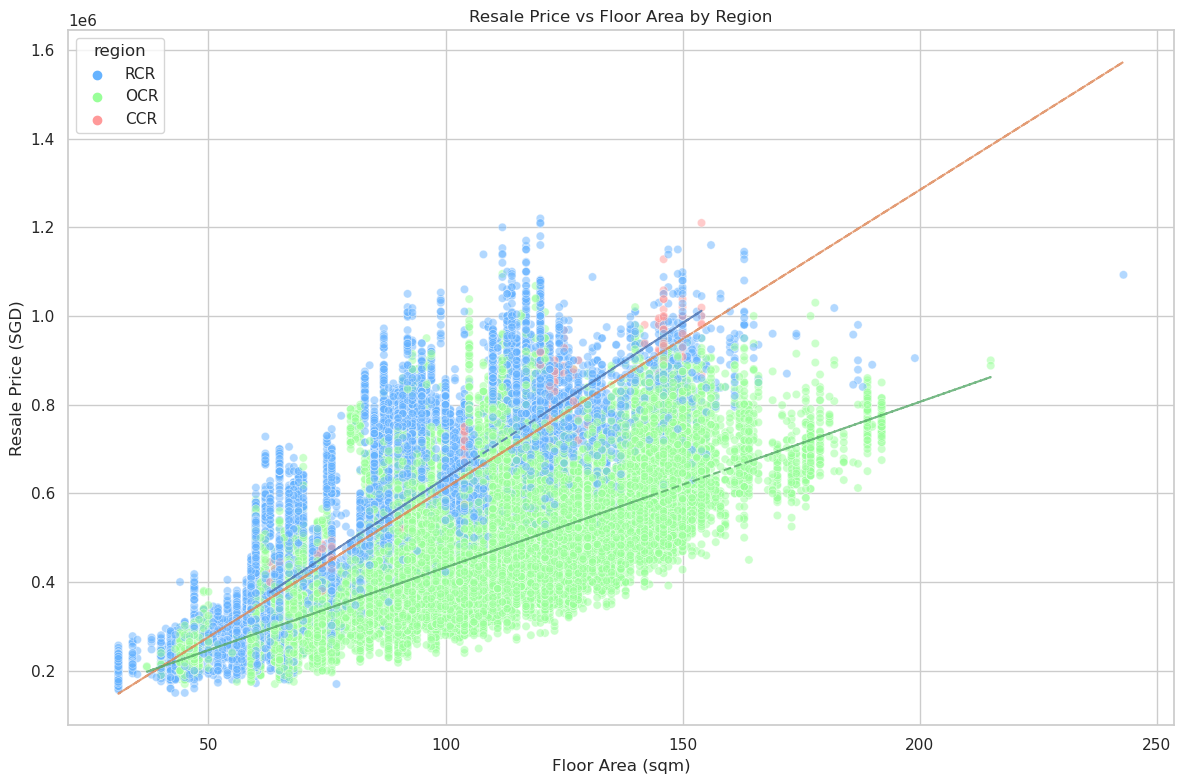

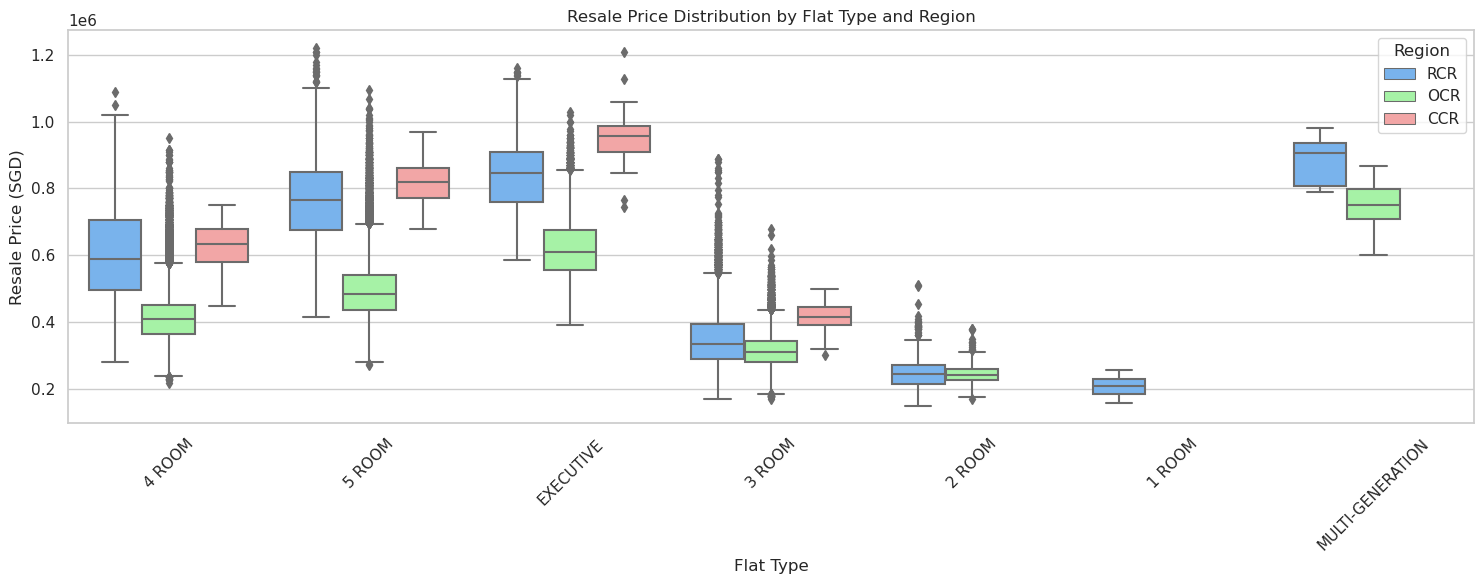

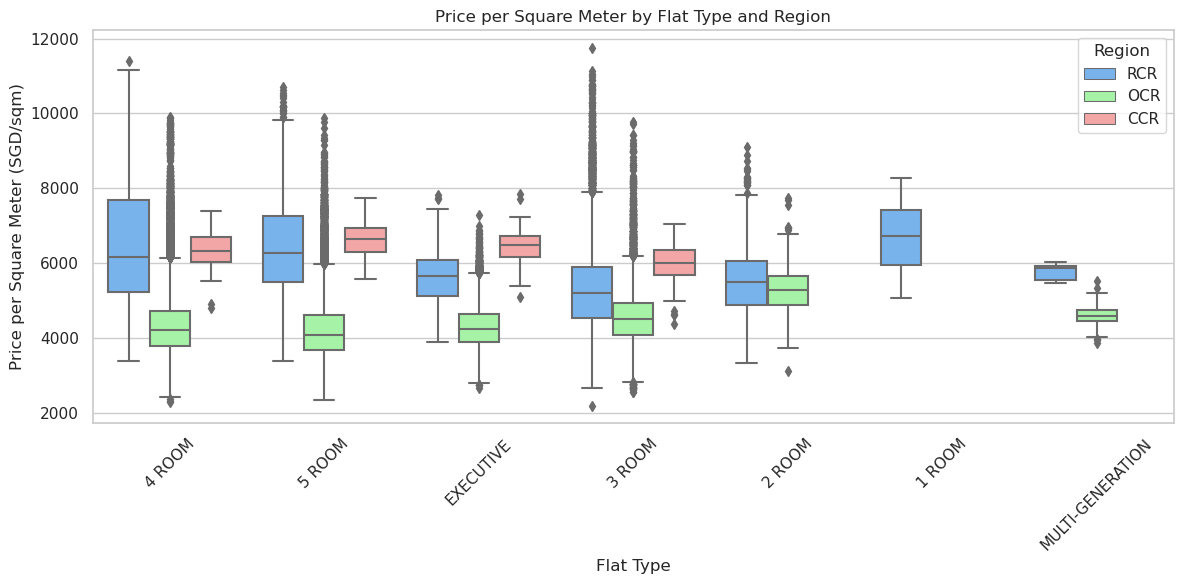

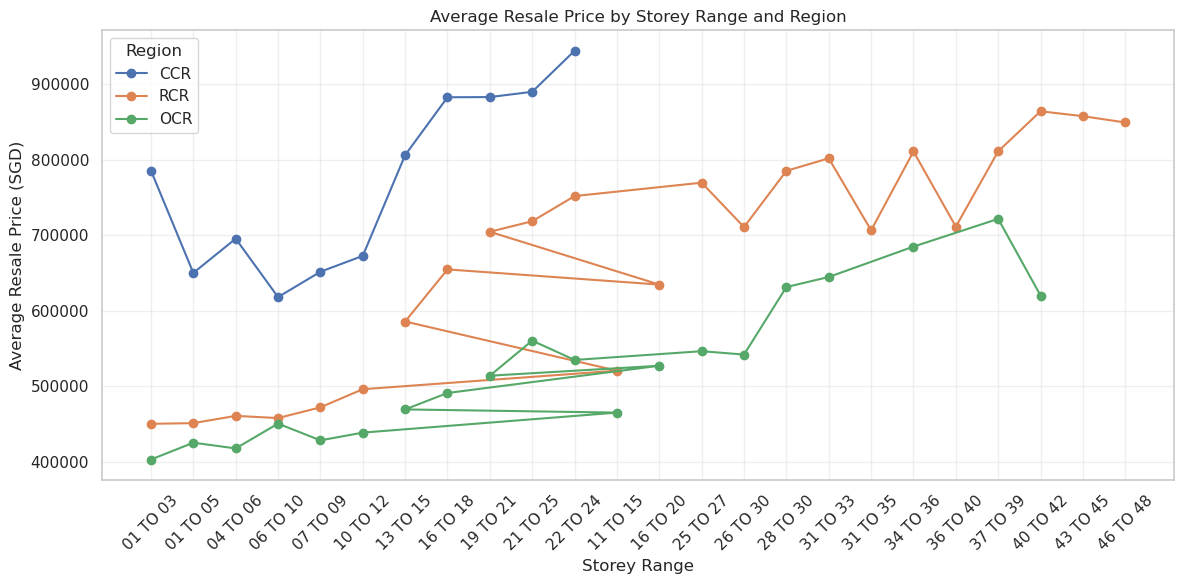

In [11]:
# 1. Scatter plot: Floor Area vs Resale Price (colored by region)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, 
                x='floor_area_sqm', 
                y='resale_price',
                hue='region',
                alpha=0.5,
                palette={'CCR': '#ff9999', 'RCR': '#66b3ff', 'OCR': '#99ff99'})

plt.title('Resale Price vs Floor Area by Region')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price (SGD)')

# Add trend lines for each region
for region in ['CCR', 'RCR', 'OCR']:
    region_data = data[data['region'] == region]
    z = np.polyfit(region_data['floor_area_sqm'], region_data['resale_price'], 1)
    p = np.poly1d(z)
    plt.plot(region_data['floor_area_sqm'], p(region_data['floor_area_sqm']), 
             linestyle='--', alpha=0.8)

plt.tight_layout()

# 2. Box plots of prices by flat_type (faceted by region)
plt.figure(figsize=(15, 6))
sns.boxplot(data=data, 
            x='flat_type', 
            y='resale_price',
            hue='region',
            palette={'CCR': '#ff9999', 'RCR': '#66b3ff', 'OCR': '#99ff99'})

plt.title('Resale Price Distribution by Flat Type and Region')
plt.xlabel('Flat Type')
plt.ylabel('Resale Price (SGD)')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()

# 4. Additional Analysis: Price per Square Meter by Flat Type and Region
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, 
            x='flat_type', 
            y='price_per_sqm',
            hue='region',
            palette={'CCR': '#ff9999', 'RCR': '#66b3ff', 'OCR': '#99ff99'})

plt.title('Price per Square Meter by Flat Type and Region')
plt.xlabel('Flat Type')
plt.ylabel('Price per Square Meter (SGD/sqm)')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()

# 3. Line plot of average prices by storey_range
# First, let's create a proper ordering of storey ranges
storey_order = sorted(data['storey_range'].unique(), 
                     key=lambda x: int(x.split(' TO ')[0]))

plt.figure(figsize=(12, 6))
avg_price_by_storey = data.groupby(['storey_range', 'region'])['resale_price'].mean().reset_index()

# Create line plot
for region in ['CCR', 'RCR', 'OCR']:
    region_data = avg_price_by_storey[avg_price_by_storey['region'] == region]
    plt.plot(region_data['storey_range'], 
            region_data['resale_price'], 
            marker='o',
            label=region)

plt.title('Average Resale Price by Storey Range and Region')
plt.xlabel('Storey Range')
plt.ylabel('Average Resale Price (SGD)')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.grid(True, alpha=0.3)
plt.tight_layout()



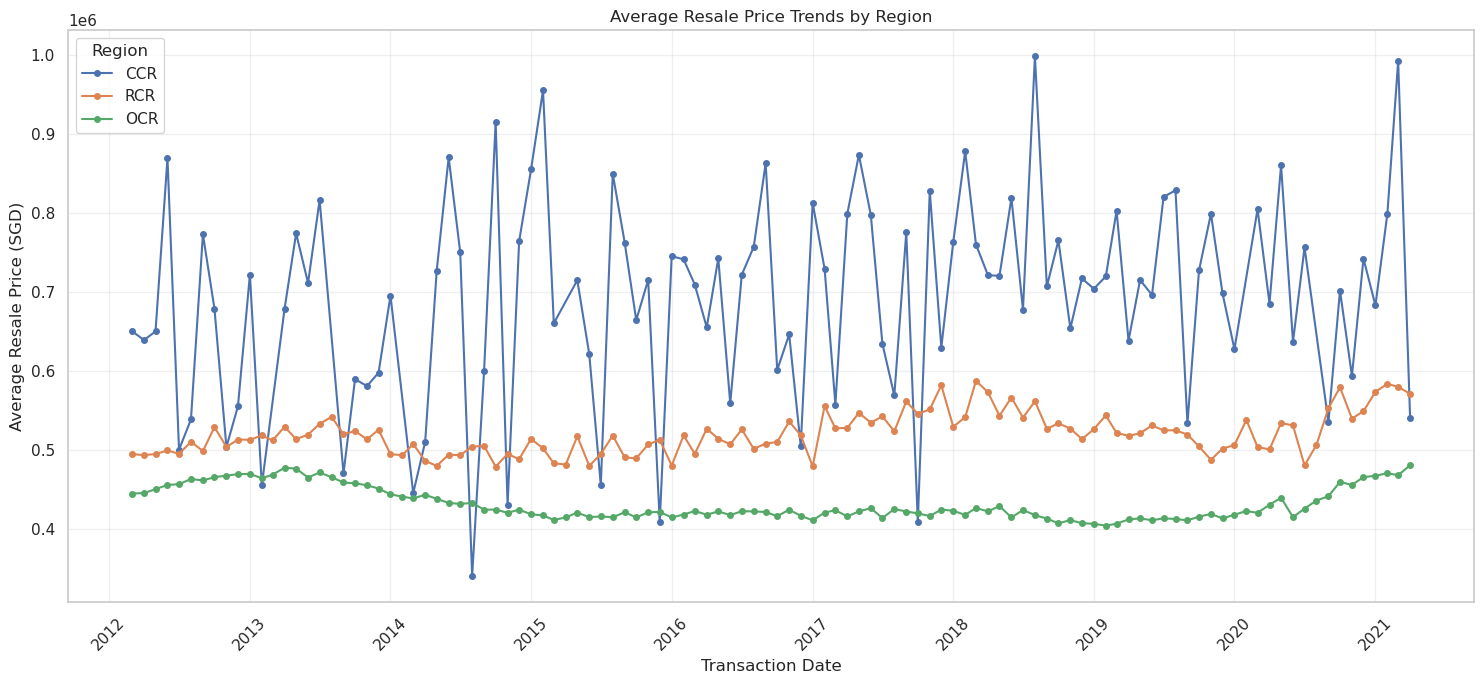

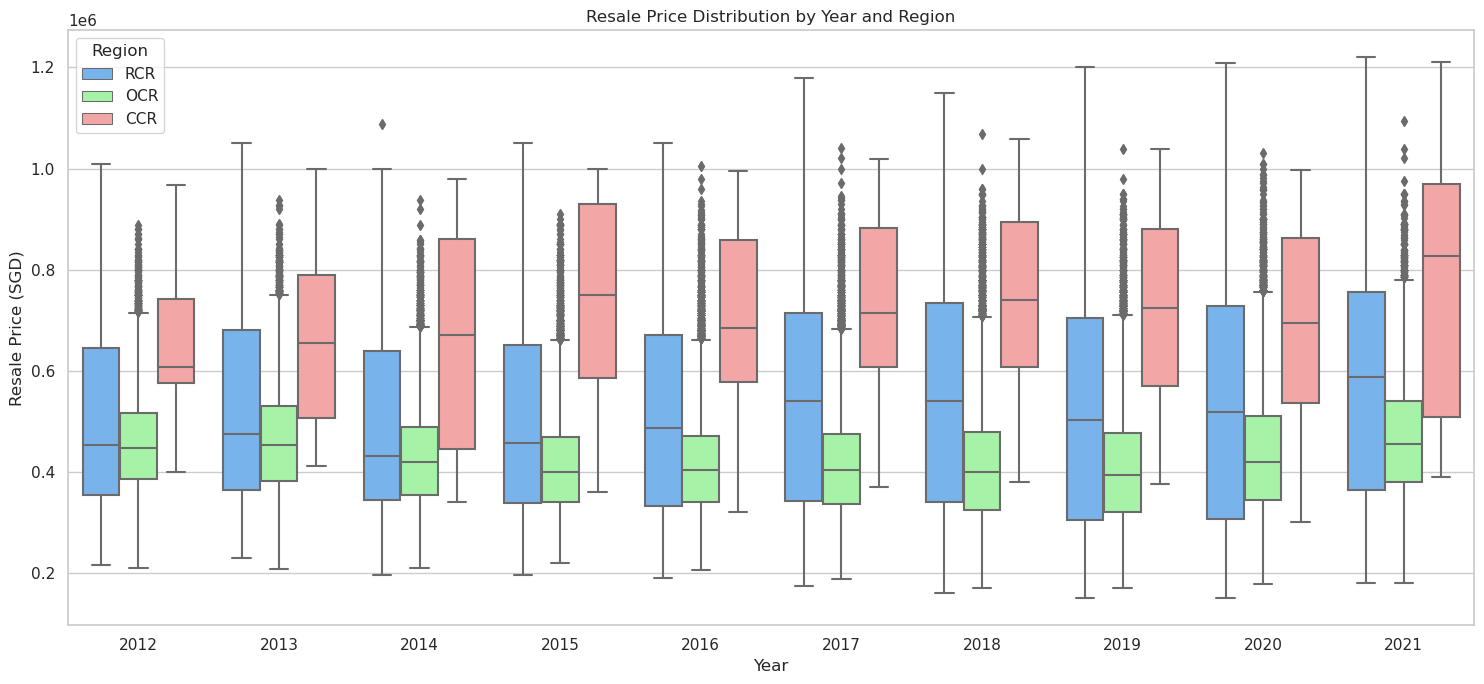

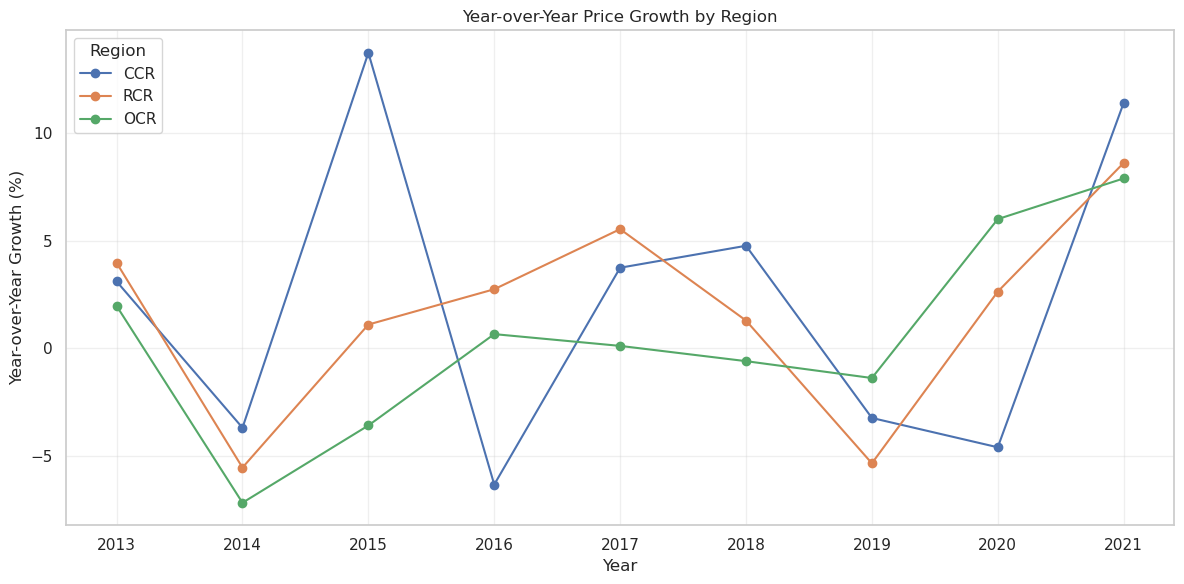

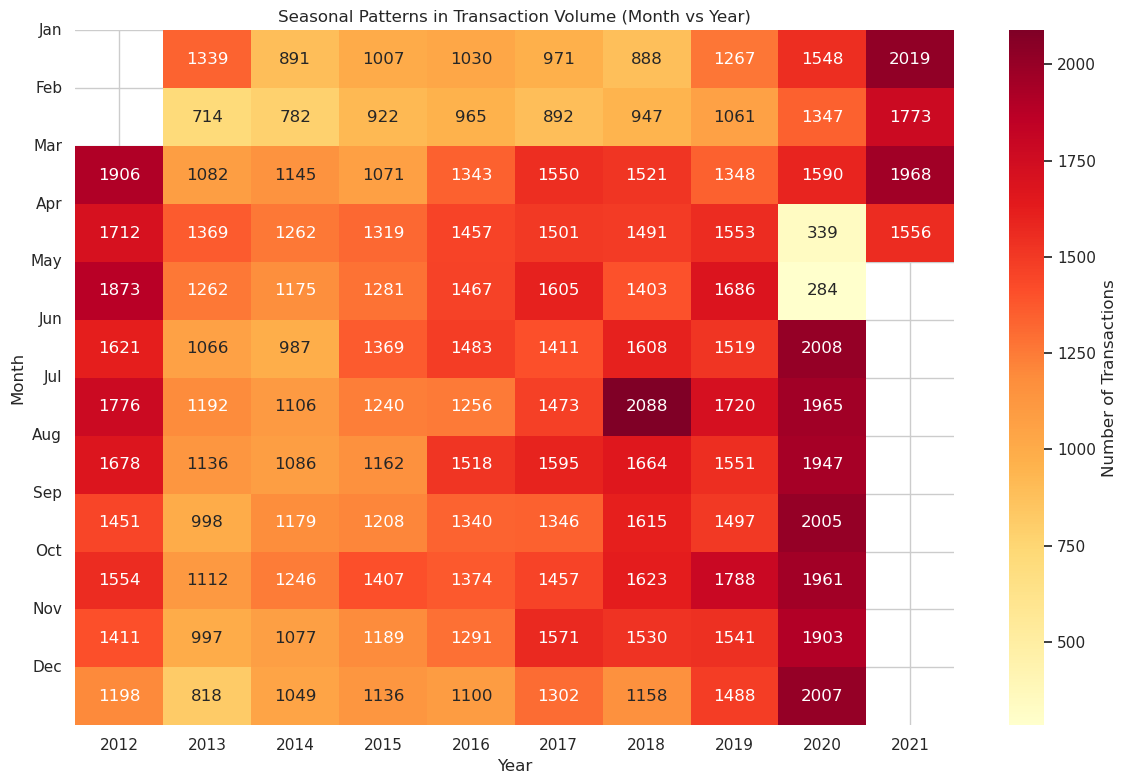

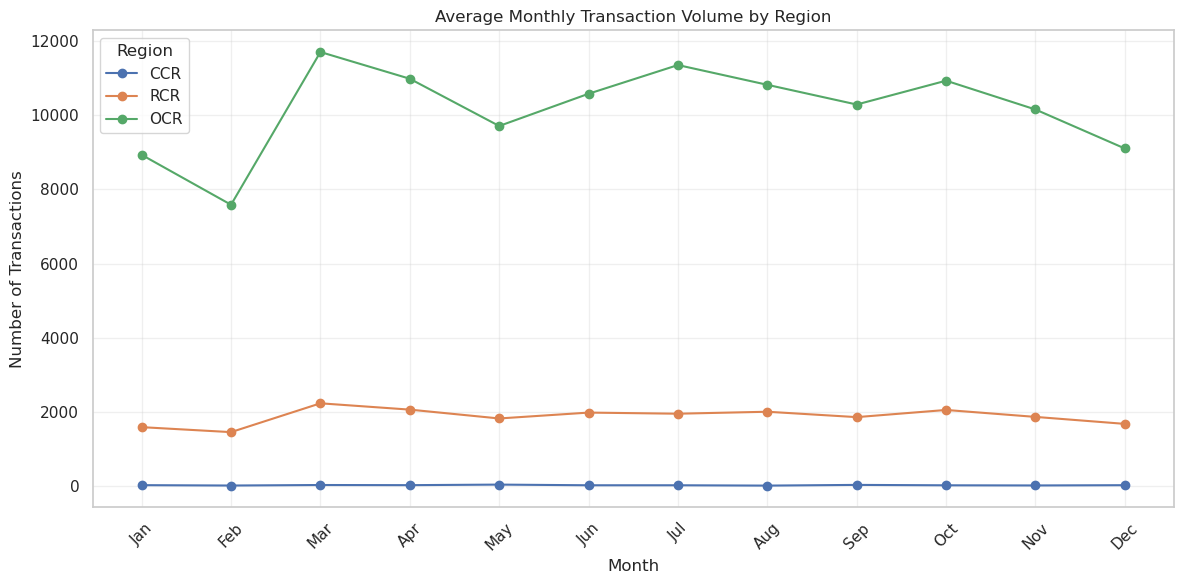

In [12]:
# Extract year and month from Tranc_YearMonth
data['transaction_date'] = pd.to_datetime(data['Tranc_YearMonth'], format='%Y-%m')
data['year'] = data['transaction_date'].dt.year
data['month'] = data['transaction_date'].dt.month

# 1. Line plot of average prices over time by region
plt.figure(figsize=(15, 7))
monthly_avg = data.groupby(['Tranc_YearMonth', 'region'])['resale_price'].mean().reset_index()
monthly_avg['Tranc_YearMonth'] = pd.to_datetime(monthly_avg['Tranc_YearMonth'])

# Plot lines for each region
for region in ['CCR', 'RCR', 'OCR']:
    region_data = monthly_avg[monthly_avg['region'] == region]
    plt.plot(region_data['Tranc_YearMonth'], 
            region_data['resale_price'], 
            label=region,
            marker='o',
            markersize=4)

plt.title('Average Resale Price Trends by Region')
plt.xlabel('Transaction Date')
plt.ylabel('Average Resale Price (SGD)')
plt.legend(title='Region')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

# 2. Box plots showing price distribution by year and region
plt.figure(figsize=(15, 7))
sns.boxplot(data=data, 
            x='year', 
            y='resale_price',
            hue='region',
            palette={'CCR': '#ff9999', 'RCR': '#66b3ff', 'OCR': '#99ff99'})

plt.title('Resale Price Distribution by Year and Region')
plt.xlabel('Year')
plt.ylabel('Resale Price (SGD)')
plt.legend(title='Region')
plt.tight_layout()

# 4. Additional Analysis: Year-over-Year Price Growth by Region
yearly_avg = data.groupby(['year', 'region'])['resale_price'].mean().reset_index()
yearly_avg['YoY_Growth'] = yearly_avg.groupby('region')['resale_price'].pct_change() * 100

plt.figure(figsize=(12, 6))
for region in ['CCR', 'RCR', 'OCR']:
    region_data = yearly_avg[yearly_avg['region'] == region]
    plt.plot(region_data['year'], 
            region_data['YoY_Growth'], 
            marker='o',
            label=region)

plt.title('Year-over-Year Price Growth by Region')
plt.xlabel('Year')
plt.ylabel('Year-over-Year Growth (%)')
plt.legend(title='Region')
plt.grid(True, alpha=0.3)
plt.tight_layout()

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create pivot table for transaction counts by month and year
transaction_counts = data.pivot_table(
    values='resale_price',  # Using any column here as we just want to count
    index='month',
    columns='year',
    aggfunc='count'  # Changed from 'mean' to 'count'
)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(transaction_counts,
            cmap='YlOrRd',
            annot=True,
            fmt='.0f',  # Format as integer since we're counting transactions
            cbar_kws={'label': 'Number of Transactions'})

# Customize the month labels to be more readable
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.yticks(range(12), month_labels, rotation=0)

plt.title('Seasonal Patterns in Transaction Volume (Month vs Year)')
plt.xlabel('Year')
plt.ylabel('Month')
plt.tight_layout()

# Additional insight: Monthly transaction volume by region
plt.figure(figsize=(12, 6))
monthly_volume_by_region = data.groupby(['month', 'region']).size().reset_index(name='transactions')

for region in ['CCR', 'RCR', 'OCR']:
    region_data = monthly_volume_by_region[monthly_volume_by_region['region'] == region]
    plt.plot(region_data['month'], 
            region_data['transactions'], 
            marker='o',
            label=region)

plt.title('Average Monthly Transaction Volume by Region')
plt.xlabel('Month')
plt.xticks(range(1, 13), month_labels, rotation=45)
plt.ylabel('Number of Transactions')
plt.legend(title='Region')
plt.grid(True, alpha=0.3)
plt.tight_layout()

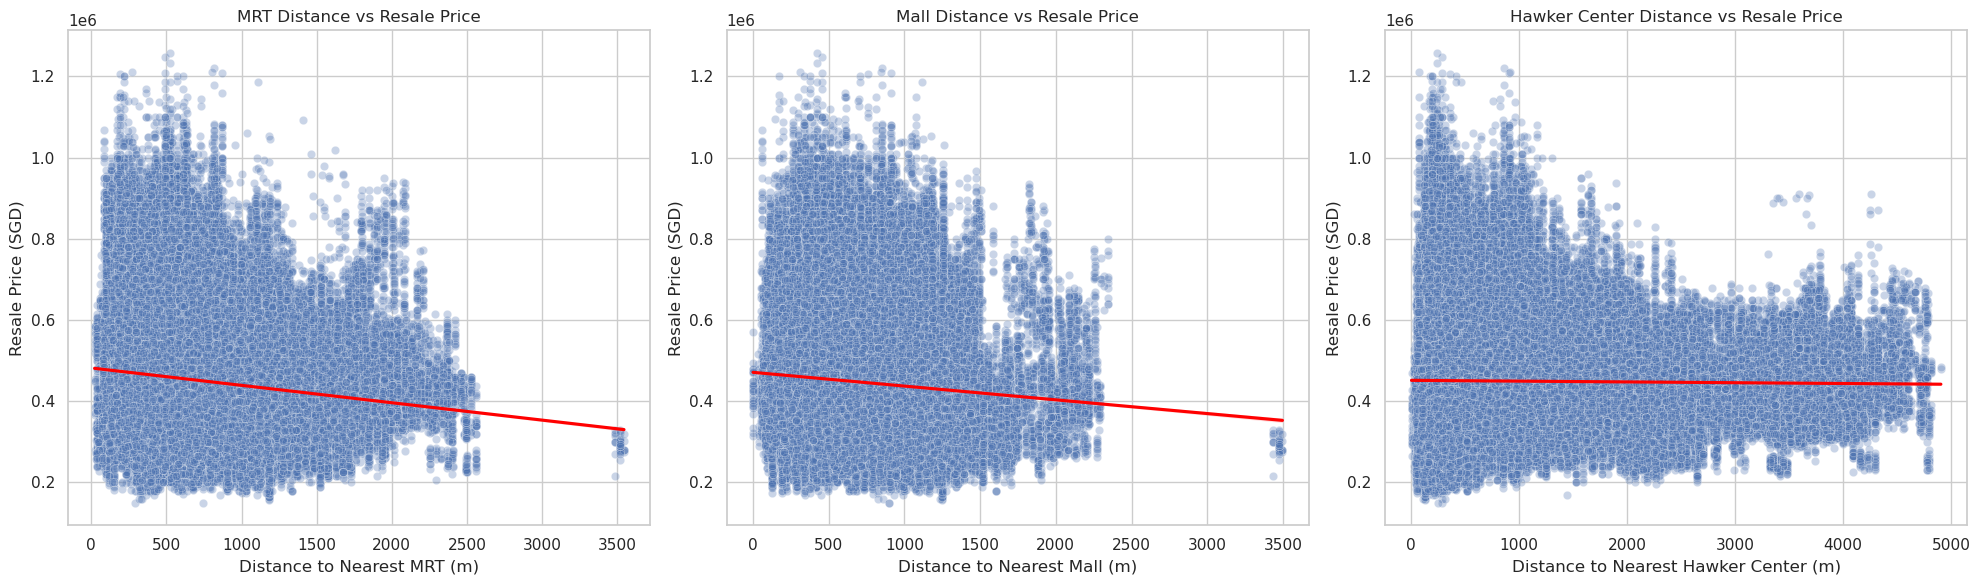

In [13]:
# Set up the figure size
plt.figure(figsize=(20, 6))

# MRT Distance vs Resale Price
plt.subplot(1, 3, 1)
sns.scatterplot(data=data, x='mrt_nearest_distance', y='resale_price', alpha=0.3)
sns.regplot(data=data, x='mrt_nearest_distance', y='resale_price', scatter=False, color='red')
plt.title('MRT Distance vs Resale Price')
plt.xlabel('Distance to Nearest MRT (m)')
plt.ylabel('Resale Price (SGD)')

# Mall Distance vs Resale Price
plt.subplot(1, 3, 2)
sns.scatterplot(data=data, x='Mall_Nearest_Distance', y='resale_price', alpha=0.3)
sns.regplot(data=data, x='Mall_Nearest_Distance', y='resale_price', scatter=False, color='red')
plt.title('Mall Distance vs Resale Price')
plt.xlabel('Distance to Nearest Mall (m)')
plt.ylabel('Resale Price (SGD)')

# Hawker Distance vs Resale Price
plt.subplot(1, 3, 3)
sns.scatterplot(data=data, x='Hawker_Nearest_Distance', y='resale_price', alpha=0.3)
sns.regplot(data=data, x='Hawker_Nearest_Distance', y='resale_price', scatter=False, color='red')
plt.title('Hawker Center Distance vs Resale Price')
plt.xlabel('Distance to Nearest Hawker Center (m)')
plt.ylabel('Resale Price (SGD)')

plt.tight_layout()
plt.show()


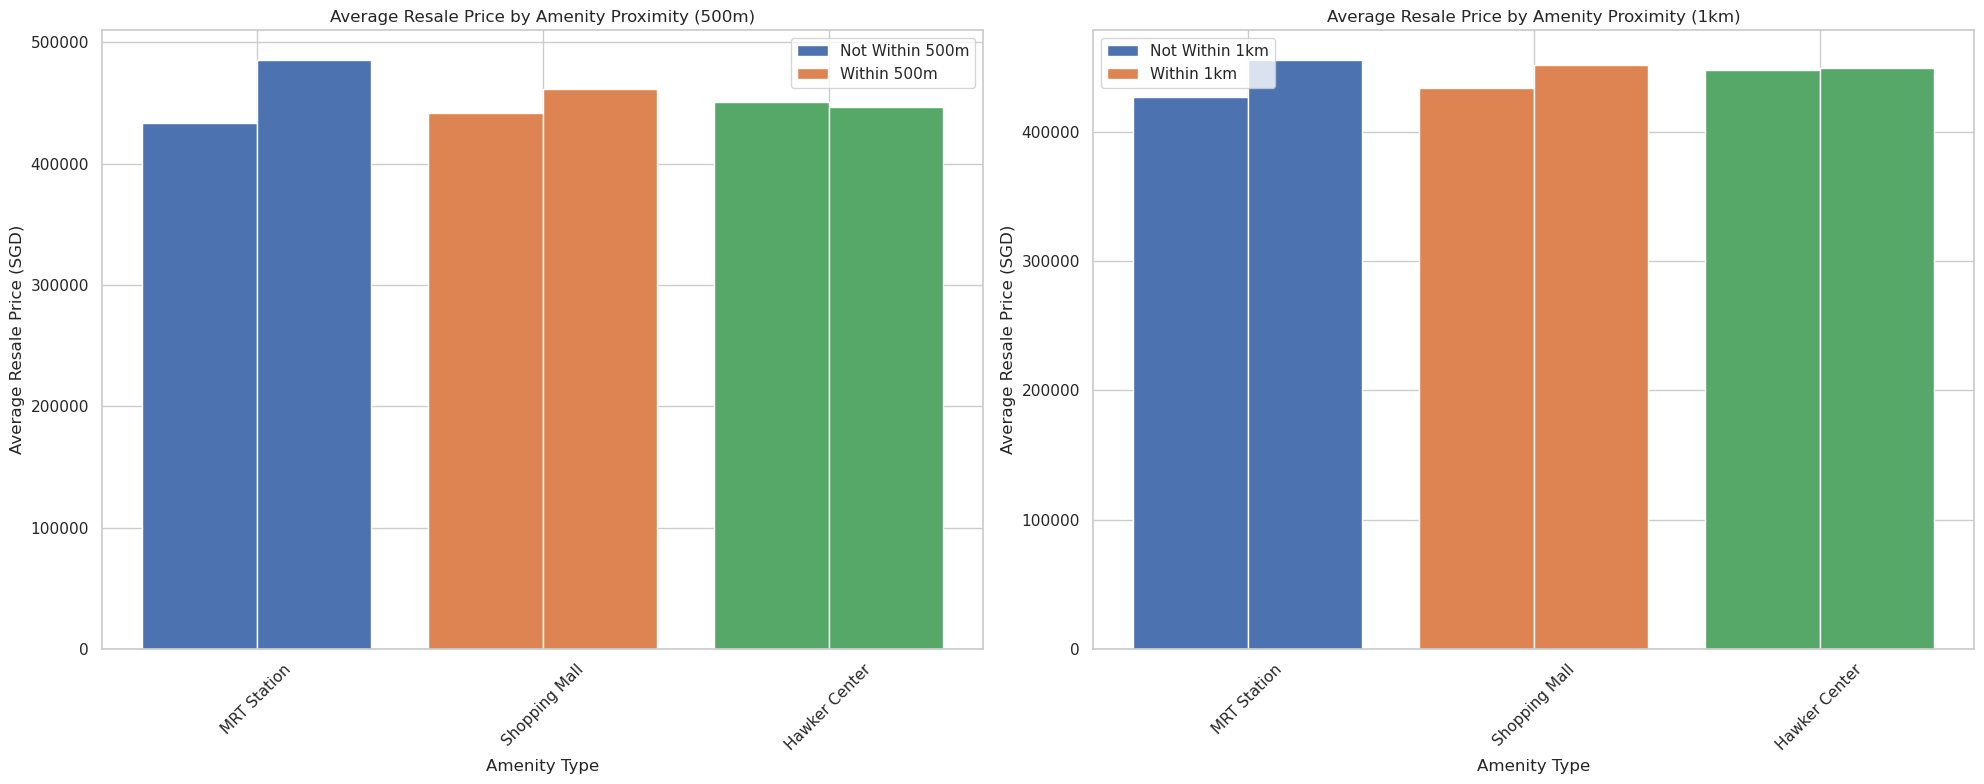

In [14]:
# Create binary columns for amenities within 500m and 1km
data['mrt_within_500m'] = data['mrt_nearest_distance'] <= 500
data['mall_within_500m'] = data['Mall_Nearest_Distance'] <= 500
data['hawker_within_500m'] = data['Hawker_Nearest_Distance'] <= 500

data['mrt_within_1km'] = data['mrt_nearest_distance'] <= 1000
data['mall_within_1km'] = data['Mall_Nearest_Distance'] <= 1000
data['hawker_within_1km'] = data['Hawker_Nearest_Distance'] <= 1000

# Function to calculate mean prices for amenity proximity
def calculate_mean_prices(data, amenity_col):
    return data.groupby(amenity_col)['resale_price'].mean()

# Set up the figure
plt.figure(figsize=(20, 8))

# 500m comparison
plt.subplot(1, 2, 1)
amenities_500m = ['mrt_within_500m', 'mall_within_500m', 'hawker_within_500m']
labels = ['MRT Station', 'Shopping Mall', 'Hawker Center']

for i, (amenity, label) in enumerate(zip(amenities_500m, labels)):
    means = calculate_mean_prices(data, amenity)
    x = [i-0.2, i+0.2]
    plt.bar(x, means, width=0.4, label=label)
    
plt.title('Average Resale Price by Amenity Proximity (500m)')
plt.xlabel('Amenity Type')
plt.ylabel('Average Resale Price (SGD)')
plt.xticks([i for i in range(len(labels))], labels, rotation=45)
plt.legend(['Not Within 500m', 'Within 500m'])

# 1km comparison
plt.subplot(1, 2, 2)
amenities_1km = ['mrt_within_1km', 'mall_within_1km', 'hawker_within_1km']

for i, (amenity, label) in enumerate(zip(amenities_1km, labels)):
    means = calculate_mean_prices(data, amenity)
    x = [i-0.2, i+0.2]
    plt.bar(x, means, width=0.4, label=label)
    
plt.title('Average Resale Price by Amenity Proximity (1km)')
plt.xlabel('Amenity Type')
plt.ylabel('Average Resale Price (SGD)')
plt.xticks([i for i in range(len(labels))], labels, rotation=45)
plt.legend(['Not Within 1km', 'Within 1km'])

plt.tight_layout()
plt.show()


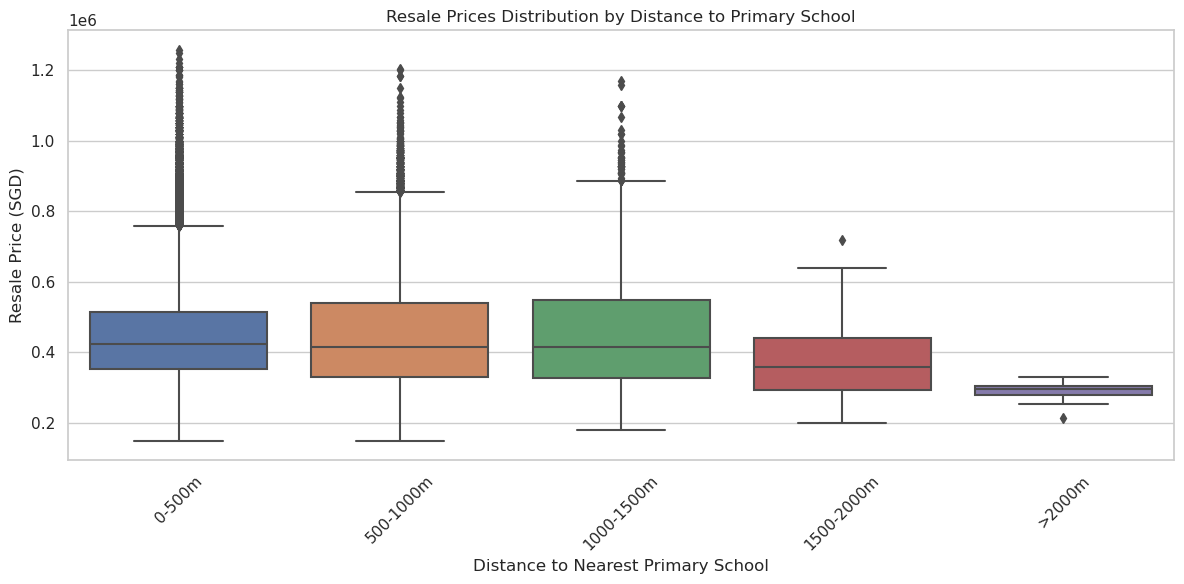


Price Statistics by Distance to Primary School:
                           mean    median   count
pri_sch_distance_cat                             
0-500m                449113.57  425000.0  112394
500-1000m             450125.95  415000.0   34945
1000-1500m            453619.38  414000.0    2806
1500-2000m            371732.46  360000.0     451
>2000m                293810.53  295000.0      38


In [15]:
# 1. Box plots of prices based on primary school distance

# Create distance categories for better visualization
distance_bins = [0, 500, 1000, 1500, 2000, np.inf]
distance_labels = ['0-500m', '500-1000m', '1000-1500m', '1500-2000m', '>2000m']
data['pri_sch_distance_cat'] = pd.cut(data['pri_sch_nearest_distance'], 
                                    bins=distance_bins, 
                                    labels=distance_labels)

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='pri_sch_distance_cat', y='resale_price')
plt.title('Resale Prices Distribution by Distance to Primary School')
plt.xlabel('Distance to Nearest Primary School')
plt.ylabel('Resale Price (SGD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate and display statistics
distance_stats = data.groupby('pri_sch_distance_cat')['resale_price'].agg(['mean', 'median', 'count']).round(2)
print("\nPrice Statistics by Distance to Primary School:")
print(distance_stats)

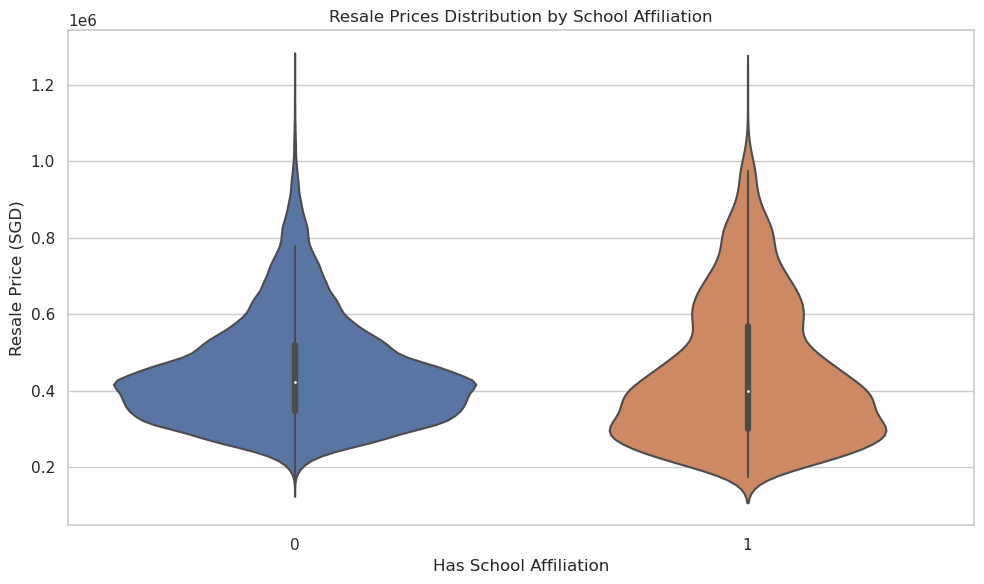


Price Statistics by School Affiliation:
                  mean    median   count
affiliation                             
0            449173.63  422000.0  145832
1            448793.23  400000.0    4802

Price premium for units with school affiliation: -0.08%


In [16]:
# 2. Compare prices for units with/without school affiliation
plt.figure(figsize=(10, 6))

# Create violin plot to show price distribution
sns.violinplot(data=data, x='affiliation', y='resale_price')
plt.title('Resale Prices Distribution by School Affiliation')
plt.xlabel('Has School Affiliation')
plt.ylabel('Resale Price (SGD)')
plt.tight_layout()
plt.show()

# Calculate statistics
affiliation_stats = data.groupby('affiliation')['resale_price'].agg(['mean', 'median', 'count']).round(2)
print("\nPrice Statistics by School Affiliation:")
print(affiliation_stats)

# Calculate price premium for affiliated schools
if len(affiliation_stats) > 1:
    price_premium = ((affiliation_stats.iloc[1]['mean'] - affiliation_stats.iloc[0]['mean']) / 
                    affiliation_stats.iloc[0]['mean'] * 100).round(2)
    print(f"\nPrice premium for units with school affiliation: {price_premium}%")

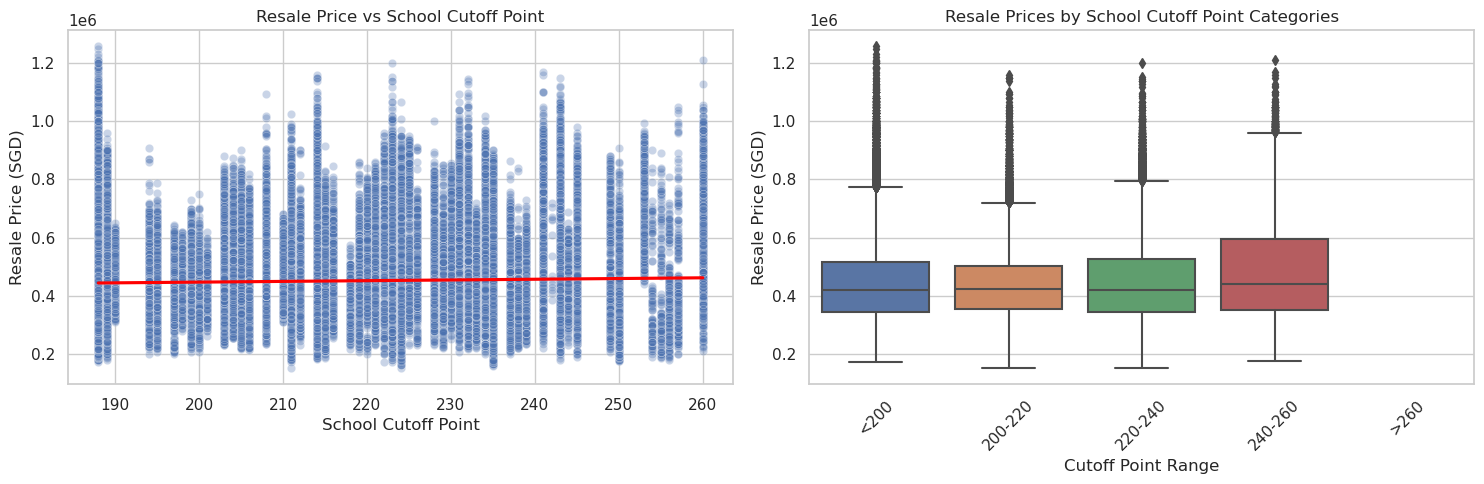


Correlation between resale price and school cutoff point: 0.035

Price Statistics by Cutoff Point Category:
                      mean    median  count
cutoff_category                            
<200             446217.91  420000.0  61353
200-220          440044.61  422000.0  38126
220-240          449518.41  420000.0  36429
240-260          484146.33  440000.0  14726
>260                   NaN       NaN      0


In [17]:
# 3. Analyze impact of school cutoff_point on nearby unit prices
plt.figure(figsize=(15, 5))

# Scatter plot with trend line
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='cutoff_point', y='resale_price', alpha=0.3)
sns.regplot(data=data, x='cutoff_point', y='resale_price', scatter=False, color='red')
plt.title('Resale Price vs School Cutoff Point')
plt.xlabel('School Cutoff Point')
plt.ylabel('Resale Price (SGD)')

# Box plot for categorized cutoff points
plt.subplot(1, 2, 2)
# Create cutoff point categories
cutoff_bins = [0, 200, 220, 240, 260, np.inf]
cutoff_labels = ['<200', '200-220', '220-240', '240-260', '>260']
data['cutoff_category'] = pd.cut(data['cutoff_point'], 
                                bins=cutoff_bins,
                                labels=cutoff_labels)

sns.boxplot(data=data, x='cutoff_category', y='resale_price')
plt.title('Resale Prices by School Cutoff Point Categories')
plt.xlabel('Cutoff Point Range')
plt.ylabel('Resale Price (SGD)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Calculate correlation
correlation = data['resale_price'].corr(data['cutoff_point']).round(3)
print(f"\nCorrelation between resale price and school cutoff point: {correlation}")

# Calculate average prices by cutoff category
cutoff_stats = data.groupby('cutoff_category')['resale_price'].agg(['mean', 'median', 'count']).round(2)
print("\nPrice Statistics by Cutoff Point Category:")
print(cutoff_stats)